In [1]:
import pandas as pd

ModuleNotFoundError: No module named 'pandas'

In [3]:
master_df = pd.read_pickle("master_df.pkl")
master_df

,teamId_w,firstBlood_w,firstTower_w,firstInhibitor_w,firstBaron_w,firstDragon_w,firstRiftHerald_w,towerKills_w,inhibitorKills_w,baronKills_w,...,firstDragon_l,firstRiftHerald_l,towerKills_l,inhibitorKills_l,baronKills_l,dragonKills_l,vilemawKills_l,riftHeraldKills_l,dominionVictoryScore_l,bans_l
0,200,False,True,True,False,True,True,9,1,0,...,False,False,0,0,0,0,0,0,0,"[{'championId': -1, 'pickTurn': 1}, {'champion..."
1,100,False,False,False,False,True,True,4,0,0,...,False,False,2,0,0,0,0,0,0,"[{'championId': 875, 'pickTurn': 6}, {'champio..."
2,200,True,True,True,False,True,True,5,1,0,...,False,False,0,0,0,0,0,0,0,"[{'championId': 110, 'pickTurn': 1}, {'champio..."
3,200,True,True,False,False,False,True,6,0,1,...,True,False,2,0,1,1,0,0,0,"[{'championId': 523, 'pickTurn': 1}, {'champio..."
4,100,True,True,True,True,True,True,11,3,2,...,False,False,6,1,1,3,0,0,0,"[{'championId': 523, 'pickTurn': 6}, {'champio..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109160,100,False,True,True,True,True,False,9,2,1,...,False,False,3,0,0,1,0,0,0,[]
109161,100,True,False,False,True,False,False,5,0,1,...,True,True,3,0,0,2,0,2,0,"[{'championId': 84, 'pickTurn': 6}, {'champion..."
109162,100,False,False,False,True,False,False,6,1,2,...,True,True,6,1,0,3,0,1,0,"[{'championId': 107, 'pickTurn': 6}, {'champio..."
109163,100,True,True,True,False,False,False,10,2,0,...,True,False,5,0,1,3,0,0,0,[]


In [3]:
df1 = master_df.filter(["firstBlood_w","firstBlood_l"])

In [2]:
master_df

NameError: name 'master_df' is not defined

We create a function that graphs the % of wins/loses given a true/false condition

In [4]:
import matplotlib.pyplot as plt
def graph_vs_condit(df,colu,ylab,titl):
    values = [(df[colu].value_counts()[True]/len(df))*100,(df[colu].value_counts()[False]/len(df))*100]
    plt.bar(["Winner","Looser"],values,color=["lightblue","lightpink"])
    plt.title(titl)
    plt.ylabel(ylab)
    plt.show()


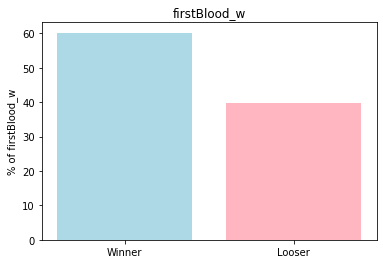

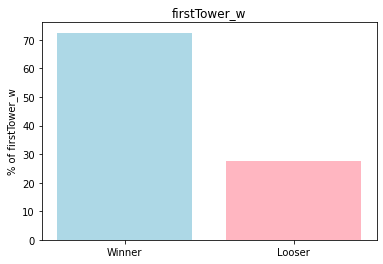

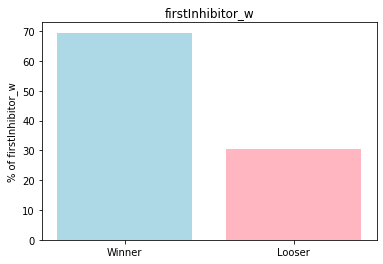

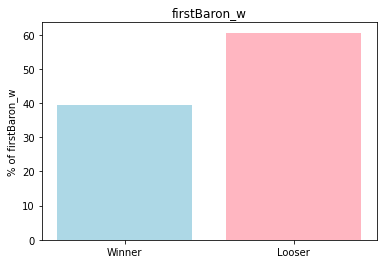

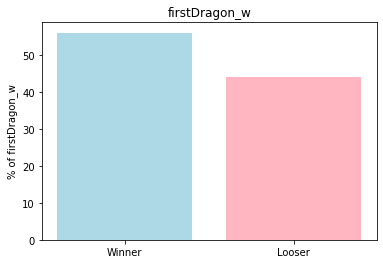

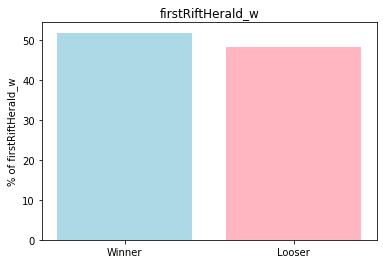

In [5]:
cols_wanted = ['firstBlood_w','firstTower_w', 'firstInhibitor_w',
       'firstBaron_w', 'firstDragon_w', 'firstRiftHerald_w']

for cl in cols_wanted:
    graph_vs_condit(master_df,cl,"% of "+format(cl),cl)


We create a function that box-plots the given median of winner-vs-looser teams

In [6]:
def box_plot_winVSlos(df,col,titl):
    plt.boxplot(df[df[col]!= 0][col])
    plt.title = titl
    plt.show()

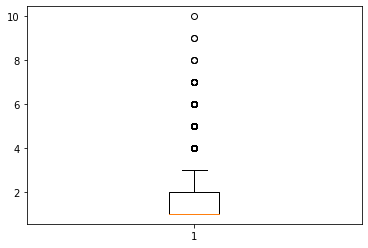

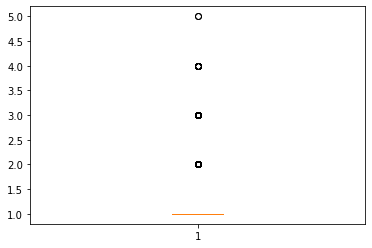

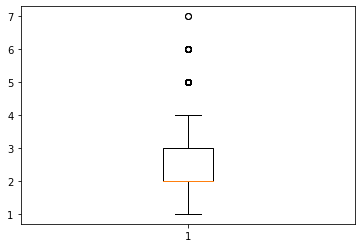

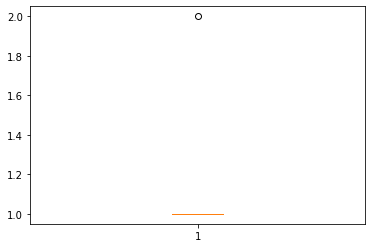

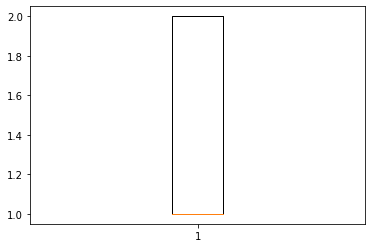

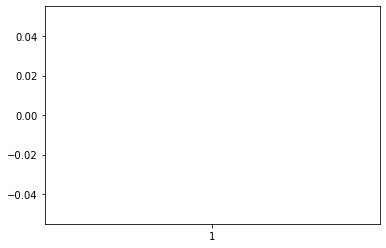

In [7]:
cols_wanted = [
       'inhibitorKills_w', 'baronKills_w', 'dragonKills_w', 'vilemawKills_w',
       'riftHeraldKills_w', 'dominionVictoryScore_w']
for cl in cols_wanted:
    box_plot_winVSlos(master_df,cl,cl)

In [8]:
import json
from pandas.io.json import json_normalize
jugadorsito = pd.json_normalize(master_df['participants'])
pd.set_option('max_columns', None)
jugadorsito

,participantId,teamId,championId,spell1Id,spell2Id,stats.participantId,stats.win,stats.item0,stats.item1,stats.item2,stats.item3,stats.item4,stats.item5,stats.item6,stats.kills,stats.deaths,stats.assists,stats.largestKillingSpree,stats.largestMultiKill,stats.killingSprees,stats.longestTimeSpentLiving,stats.doubleKills,stats.tripleKills,stats.quadraKills,stats.pentaKills,stats.unrealKills,stats.totalDamageDealt,stats.magicDamageDealt,stats.physicalDamageDealt,stats.trueDamageDealt,stats.largestCriticalStrike,stats.totalDamageDealtToChampions,stats.magicDamageDealtToChampions,stats.physicalDamageDealtToChampions,stats.trueDamageDealtToChampions,stats.totalHeal,stats.totalUnitsHealed,stats.damageSelfMitigated,stats.damageDealtToObjectives,stats.damageDealtToTurrets,stats.visionScore,stats.timeCCingOthers,stats.totalDamageTaken,stats.magicalDamageTaken,stats.physicalDamageTaken,stats.trueDamageTaken,stats.goldEarned,stats.goldSpent,stats.turretKills,stats.inhibitorKills,stats.totalMinionsKilled,stats.neutralMinionsKilled,stats.neutralMinionsKilledTeamJungle,stats.neutralMinionsKilledEnemyJungle,stats.totalTimeCrowdControlDealt,stats.champLevel,stats.visionWardsBoughtInGame,stats.sightWardsBoughtInGame,stats.wardsPlaced,stats.wardsKilled,stats.firstBloodKill,stats.firstBloodAssist,stats.firstTowerKill,stats.firstTowerAssist,stats.firstInhibitorKill,stats.firstInhibitorAssist,stats.combatPlayerScore,stats.objectivePlayerScore,stats.totalPlayerScore,stats.totalScoreRank,stats.playerScore0,stats.playerScore1,stats.playerScore2,stats.playerScore3,stats.playerScore4,stats.playerScore5,stats.playerScore6,stats.playerScore7,stats.playerScore8,stats.playerScore9,stats.perk0,stats.perk0Var1,stats.perk0Var2,stats.perk0Var3,stats.perk1,stats.perk1Var1,stats.perk1Var2,stats.perk1Var3,stats.perk2,stats.perk2Var1,stats.perk2Var2,stats.perk2Var3,stats.perk3,stats.perk3Var1,stats.perk3Var2,stats.perk3Var3,stats.perk4,stats.perk4Var1,stats.perk4Var2,stats.perk4Var3,stats.perk5,stats.perk5Var1,stats.perk5Var2,stats.perk5Var3,stats.perkPrimaryStyle,stats.perkSubStyle,stats.statPerk0,stats.statPerk1,stats.statPerk2,timeline.participantId,timeline.creepsPerMinDeltas.10-20,timeline.creepsPerMinDeltas.0-10,timeline.xpPerMinDeltas.10-20,timeline.xpPerMinDeltas.0-10,timeline.goldPerMinDeltas.10-20,timeline.goldPerMinDeltas.0-10,timeline.damageTakenPerMinDeltas.10-20,timeline.damageTakenPerMinDeltas.0-10,timeline.role,timeline.lane,timeline.csDiffPerMinDeltas.10-20,timeline.csDiffPerMinDeltas.0-10,timeline.xpDiffPerMinDeltas.10-20,timeline.xpDiffPerMinDeltas.0-10,timeline.damageTakenDiffPerMinDeltas.10-20,timeline.damageTakenDiffPerMinDeltas.0-10
0,1,100,7,1,4,1,False,2033,3285,3108,1082,3020,2055,3364,3,6,3,2,1,1,564,0,0,0,0,0,71369,56332,13037,1999,0,10844,8926,1918,0,4006,1,6742,1055,1008,14,12,17255,5282,11203,770,6844,6710,0,0,133,0,0,0,19,12,3,0,6,1,True,False,False,False,False,False,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8112,735,0,0,8139,664,0,0,8138,12,0,0,8135,1652,3,0,8316,2016,0,0,8352,288,1854,984,8100,8300,5005,5008,5003,1,6.2,6.1,473.5,386.6,277.0,315.6,906.0,473.8,DUO_CARRY,MIDDLE,NaN,NaN,NaN,NaN,NaN,NaN
1,2,100,350,3,7,2,False,3114,3853,0,1004,3041,3174,3364,0,6,10,0,0,0,559,0,0,0,0,0,11569,8968,2601,0,0,7095,6069,1025,0,11758,5,5371,427,427,34,8,9994,2293,7163,537,5205,5212,0,0,2,0,0,0,38,10,4,0,17,1,False,False,False,False,False,False,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8214,781,1229,0,8226,250,846,0,8210,0,0,0,8237,476,0,0,8009,2209,500,0,8017,429,0,0,8200,8000,5008,5008,5002,2,0.2,0.0,368.5,215.1,248.0,178.7,411.4,244.6,DUO_SUPPORT,MIDDLE,NaN,NaN,NaN,NaN,NaN,NaN
2,3,100,266,4,12,3,False,1054,3155,2031,3133,3047,3071,3364,4,5,2,2,1,1,419,0,0,0,0,0,83332,0,80978,2354,0,13458,0,13332,126,5215,1,18085,703,515,8,19,23283,6950,15297,1035,8226,7300,0,0,133,18,8,10,173,13,2,0,5,1,False,False,False,False,False,False,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8010,157,0,0,9111,531,120,0,9105,18,20,0,8299,353,0,0,8473,669,0,0,8453,611,135,0,8000,8400,5007,5008,5003,3,5.1,6.5,505.1

In [14]:
from pandas.io.json import json_normalize
positions_names = ["DUO_CARRY","DUO_SUPPORT","MIDDLE","TOP","JUNGLE"]
positions_kill_medians = ("DUO_CARRY":0,"DUO_SUPPORT":0,"MIDDLE":0,"TOP":0,"JUNGLE":0)
for name in positions_names:
    for p in master_df["participants"]:
        partcs = json_normalize(p)
    positions_kill_medians[name]+= partcs[partcs["timeline.role"]==name or partcs["timeline.lane"]==name]
 

SyntaxError: invalid syntax (1959907977.py, line 3)